## Import Python Libraries

In [1]:
# Import Basic Libraries 

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# For timeseries RNN Nueral Network 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

2023-03-04 22:08:28.055917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 22:08:28.202565: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-04 22:08:28.202611: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-04 22:08:29.137875: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# Import KERAS: TimeseriesGenerator 
# This class produces time saeries batches used on training/testing the model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [4]:
# Import KERAS: MinMaxScaler
# This class is used to preprocess (scale) the data
from sklearn.preprocessing import MinMaxScaler

## Generate Data

In [5]:
#Create a simple sine wave using Numpy

x=np.linspace(0,80,900)
y=np.sin(x)

In [6]:
x

array([ 0.        ,  0.08898776,  0.17797553,  0.26696329,  0.35595106,
        0.44493882,  0.53392659,  0.62291435,  0.71190211,  0.80088988,
        0.88987764,  0.97886541,  1.06785317,  1.15684093,  1.2458287 ,
        1.33481646,  1.42380423,  1.51279199,  1.60177976,  1.69076752,
        1.77975528,  1.86874305,  1.95773081,  2.04671858,  2.13570634,
        2.2246941 ,  2.31368187,  2.40266963,  2.4916574 ,  2.58064516,
        2.66963293,  2.75862069,  2.84760845,  2.93659622,  3.02558398,
        3.11457175,  3.20355951,  3.29254727,  3.38153504,  3.4705228 ,
        3.55951057,  3.64849833,  3.7374861 ,  3.82647386,  3.91546162,
        4.00444939,  4.09343715,  4.18242492,  4.27141268,  4.36040044,
        4.44938821,  4.53837597,  4.62736374,  4.7163515 ,  4.80533927,
        4.89432703,  4.98331479,  5.07230256,  5.16129032,  5.25027809,
        5.33926585,  5.42825362,  5.51724138,  5.60622914,  5.69521691,
        5.78420467,  5.87319244,  5.9621802 ,  6.05116796,  6.14

In [7]:
y

array([ 0.        ,  0.08887036,  0.17703744,  0.26380352,  0.34848196,
        0.43040266,  0.50891732,  0.58340462,  0.65327508,  0.71797579,
        0.77699473,  0.82986484,  0.87616774,  0.915537  ,  0.94766106,
        0.97228572,  0.9892161 ,  0.99831822,  0.99952005,  0.99281208,
        0.9782474 ,  0.95594126,  0.92607019,  0.88887056,  0.84463678,
        0.79371888,  0.7365198 ,  0.67349221,  0.60513486,  0.53198873,
        0.45463265,  0.37367879,  0.28976778,  0.20356367,  0.11574864,
        0.02701762, -0.06192721, -0.15038197, -0.23764666, -0.32303072,
       -0.40585844, -0.48547436, -0.56124843, -0.63258101, -0.6989076 ,
       -0.75970331, -0.81448703, -0.86282524, -0.90433539, -0.93868899,
       -0.96561419, -0.9848979 , -0.99638753, -0.99999215, -0.99568323,
       -0.98349488, -0.96352354, -0.93592726, -0.90092444, -0.85879206,
       -0.80986354, -0.75452609, -0.69321762, -0.62642331, -0.55467174,
       -0.47853071, -0.39860279, -0.31552048, -0.22994128, -0.14

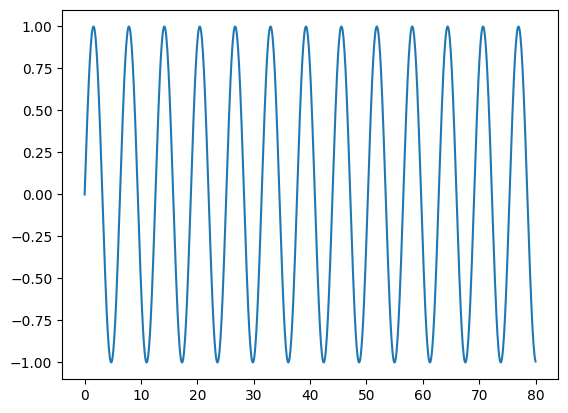

In [8]:
plt.plot(x, y)

In [9]:
#Load the data into a pandas dataframe
# --) Index: x; Data: y; column Label: Sine

df = pd.DataFrame(data=y, index=x, columns = ['Sine'])

In [10]:
df.head(5)

,Sine
0.000000,0.000000
0.088988,0.088870
0.177976,0.177037
0.266963,0.263804
0.355951,0.348482


In [11]:
len(df)

900

## Split Data --> Train / Test

In [12]:
# Set percentage of data used for testing

test_percent = 0.2

In [13]:
# Number of data points reserved for testing the model
# 20% of the original dataset

len(df)*test_percent

180.0

In [14]:
# Need to find the length  (number of data points) of the testing dataset
# It has been found (above) that around 205 data points are used for testing

test_length = np.round(len(df)*test_percent)

In [15]:
test_length

180.0

In [43]:
# The testing data set starts at this index
# Index starting with 0

test_start_index = int(len(df) - test_length)

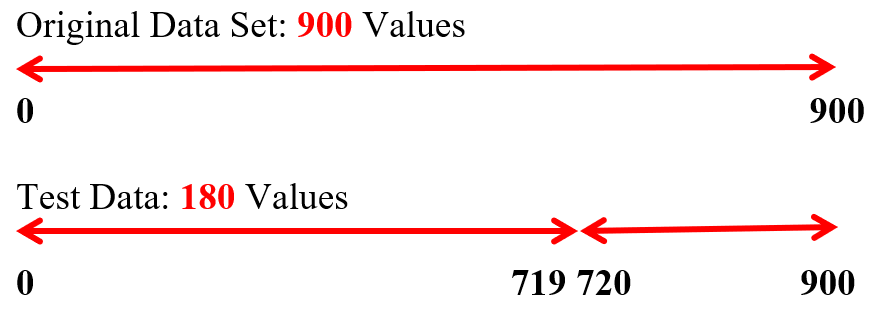

In [17]:
test_start_index

720

In [18]:
# Crate separate training / testing datasets

# Training dataset: All the indices from start to test_start_index
# (Exccluding test_start_index)
data_train = df.iloc[:test_start_index]

# Testing dataset: All the indices from test_startAA_index to the end of the dataframe
# (including test_start_index)
data_test = df.iloc[test_start_index :]

In [19]:
data_train.head(5)

,Sine
0.000000,0.000000
0.088988,0.088870
0.177976,0.177037
0.266963,0.263804
0.355951,0.348482


In [20]:
 data_test.head(5)

,Sine
64.071190,0.945568
64.160178,0.970748
64.249166,0.988244
64.338154,0.997921
64.427141,0.999700


## Normalize Data (Scale it into the range [0,1])

In [21]:
# Create a MinMaxScaler to normalize the data
scaler = MinMaxScaler()

In [22]:
# IGNORE the warning: Just converting the data to flaots
# ONLY scale the TRAINING dat - NOT scale testing data

# Train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [23]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)

# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

## Create TimeseriesGenerator instance

In [24]:
# TimeseriesGenerator: Generate time series batches for training/testing

# Set the length of the input sequence
# i.e., the number of time series steps that are used to predict the future one
# Use 50 historical data points to predict the next one
length = 50

# batch_size: Number of time series samples in each batch
# One sample: each sample is a time series input sequence
# Only one sample in each batch
batch_size = 1

# create a TimeSeriesGenerator for training: train_tsGenerator 
# --) This time series generator produces time series batches used to train the model
# TimeseriesGenerator(inputs dataset, outputs dataset, Length, batch_size)

train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length=length, batch_size=batch_size)

In [25]:
len(normalized_train)

720

In [26]:
# What does the first batch look like?
X,y = train_tsGenerator50[0]

In [27]:
# Print X.flatten()

X.flatten()

array([0.50000643, 0.5444422 , 0.58852631, 0.63190992, 0.6742497 ,
       0.71521058, 0.75446843, 0.79171257, 0.82664826, 0.85899904,
       0.88850889, 0.91494429, 0.93809605, 0.95778093, 0.97384318,
       0.98615567, 0.99462097, 0.99917209, 0.99977301, 0.99641898,
       0.98913655, 0.97798333, 0.9630476 , 0.94444754, 0.92233036,
       0.89687107, 0.86827116, 0.83675695, 0.80257783, 0.76600428,
       0.72732574, 0.68684827, 0.64489222, 0.6017896 , 0.55788151,
       0.51351542, 0.46904242, 0.42481446, 0.38118154, 0.33848895,
       0.29707455, 0.25726607, 0.21937853, 0.18371178, 0.15054805,
       0.12014979, 0.09275757, 0.06858815, 0.04783281, 0.03065578])

In [28]:
# Print y: What does X predict

y

array([[0.017193]])

# Build, Train, and Test Model

## Build SimpleRNN Model

In [29]:
# Data set: Only one column/attribute: Sine values of index x
# Features: How many features used to train the model: Only one
n_features = 1

# define model
model = Sequential()

# add a simple RNN Layer: Using SimpleRNN cells
# This Layer has 100 neurons: One neuron for each input data point
# NOTES: # time series steps of the input sequence: 50
model.add(SimpleRNN(100, input_shape=(length, n_features)))

# Add a FC (fully-connected) layer for the final prediction
# Only one neuro of the Dense/Fully-Connected Layer
# --> output: Predict the next data point of the input sequence: only one value
model.add(Dense(1))


2023-03-04 22:08:30.658627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-04 22:08:30.659448: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-04 22:08:30.659480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jbinstance2): /proc/driver/nvidia/version does not exist
2023-03-04 22:08:30.660498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Compile Model

In [30]:
# Compile the model
# Loss function. mse (Mean Squared Errors)
# NOTES: Why MSE? The data is real values/continuous: A regresion problem
# Optimizer: Adam
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


## Train(Fit) Model

In [31]:
# Fit the model
# Use fit_generator(), NOT fit()

model.fit_generator(train_tsGenerator50,epochs=5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
670/670 [==============================] - 5s 6ms/step - loss: 0.0033
Epoch 2/5
670/670 [==============================] - 4s 6ms/step - loss: 1.8816e-04
Epoch 3/5
670/670 [==============================] - 4s 6ms/step - loss: 7.3114e-05
Epoch 4/5
670/670 [==============================] - 4s 6ms/step - loss: 6.2160e-05
Epoch 5/5
670/670 [==============================] - 4s 6ms/step - loss: 9.1578e-05


# Visualize Model's Performance after Training

<AxesSubplot:>

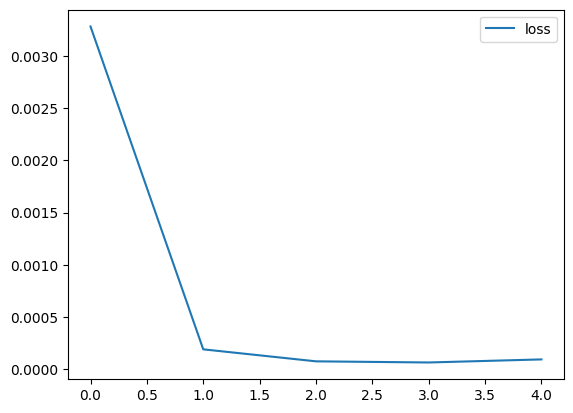

In [32]:
# Load the loss data (model.history.history) into a data frame
df_model_loss = pd.DataFrame(model.history.history)

#Visualize the loss data using DataFrame.plot()
df_model_loss.plot()

# Evaluate model on Test Data

## A sneak peek into the test data

In [33]:
# Number of time steps of the input time series
length

50

In [34]:
# Take a sneak peek into the 1st time series batch (50 data points)
# array[-length:]: A sequence of [50th to the last .. last]
first_eval_batch = normalized_train[-length : ]

first_eval_batch

array([[5.34209358e-01],
       [4.89742343e-01],
       [4.45356554e-01],
       [4.01403243e-01],
       [3.58230237e-01],
       [3.16179192e-01],
       [2.75582881e-01],
       [2.36762568e-01],
       [2.00025461e-01],
       [1.65662282e-01],
       [1.33944969e-01],
       [1.05124519e-01],
       [7.94290060e-02],
       [5.70617734e-02],
       [3.81998267e-02],
       [2.29924318e-02],
       [1.15599339e-02],
       [3.99280513e-03],
       [3.50928759e-04],
       [6.63125127e-04],
       [4.92692363e-03],
       [1.31085823e-02],
       [2.51433547e-02],
       [4.09360026e-02],
       [6.03615493e-02],
       [8.32662688e-02],
       [1.09468902e-01],
       [1.38762093e-01],
       [1.70914026e-01],
       [2.05670264e-01],
       [2.42755760e-01],
       [2.81877034e-01],
       [3.22724497e-01],
       [3.64974898e-01],
       [4.08293884e-01],
       [4.52338646e-01],
       [4.96760632e-01],
       [5.41208303e-01],
       [5.85329920e-01],
       [6.28776321e-01],


### IMPORTANT NOTES:
first_eval_batch: Currently is a 2D array 50 x 1(50 rows, 1 column)

It is necessary to reshape it into a 3D array: 1 x 50 x 1

(1 plane, 50 row, 1 column)
(#samples in a batch, #time series steps, #features)

In [35]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

first_eval_batch

array([[[5.34209358e-01],
        [4.89742343e-01],
        [4.45356554e-01],
        [4.01403243e-01],
        [3.58230237e-01],
        [3.16179192e-01],
        [2.75582881e-01],
        [2.36762568e-01],
        [2.00025461e-01],
        [1.65662282e-01],
        [1.33944969e-01],
        [1.05124519e-01],
        [7.94290060e-02],
        [5.70617734e-02],
        [3.81998267e-02],
        [2.29924318e-02],
        [1.15599339e-02],
        [3.99280513e-03],
        [3.50928759e-04],
        [6.63125127e-04],
        [4.92692363e-03],
        [1.31085823e-02],
        [2.51433547e-02],
        [4.09360026e-02],
        [6.03615493e-02],
        [8.32662688e-02],
        [1.09468902e-01],
        [1.38762093e-01],
        [1.70914026e-01],
        [2.05670264e-01],
        [2.42755760e-01],
        [2.81877034e-01],
        [3.22724497e-01],
        [3.64974898e-01],
        [4.08293884e-01],
        [4.52338646e-01],
        [4.96760632e-01],
        [5.41208303e-01],
        [5.8

In [36]:
first_eval_batch.shape

(1, 50, 1)

## Evaluate Model

In [37]:
# All the code for evaluation

# Declare a list to store all the predictions
# Similar to: test_predictions = list();
test_predictions = []

# Get the first time series batch for testing
# The 1st batch: The 1st time series input sequence
# = the last 50 data points of the train data set
first_eval_batch = normalized_train[-length:]

# Reshape the batch into 3D array: #samples/batch x Length x #feature;
current_batch = first_eval_batch.reshape((1, length, n_features))

# Run a FOR loop to make a prediction for each batch
for i in range(len(data_test)):
    
    # Get the value of the first element: The prediction
    current_pred = model.predict(current_batch)[0]
    
    # store prediction into the list of predictions
    test_predictions.append(current_pred)
    
    # Generate a new batch to prepare for the next iteration of testing
    # --) Drop the first data point of the current input sequence
    # --) Append the newly-predicted value to the tail of the input sequnece
    # --) Maintain the number of time series steps: 50
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [38]:
# Convert the scaled result back to the real values
true_predictions = scaler.inverse_transform(test_predictions)

true_predictions 

array([[ 0.92587009],
       [ 0.94739698],
       [ 0.95057493],
       [ 0.94337443],
       [ 0.92760337],
       [ 0.90443845],
       [ 0.86589179],
       [ 0.82519845],
       [ 0.77292562],
       [ 0.7135827 ],
       [ 0.64664292],
       [ 0.5753983 ],
       [ 0.4964562 ],
       [ 0.41371639],
       [ 0.3256363 ],
       [ 0.2327612 ],
       [ 0.13750028],
       [ 0.03837954],
       [-0.06254238],
       [-0.16528621],
       [-0.26895801],
       [-0.37314449],
       [-0.47524459],
       [-0.57749457],
       [-0.67575422],
       [-0.77048801],
       [-0.86078339],
       [-0.94557148],
       [-1.02280319],
       [-1.09365181],
       [-1.15494906],
       [-1.20795609],
       [-1.25110954],
       [-1.28400604],
       [-1.3071583 ],
       [-1.31987767],
       [-1.3223501 ],
       [-1.31501966],
       [-1.29849747],
       [-1.27214907],
       [-1.23739461],
       [-1.194771  ],
       [-1.14414325],
       [-1.08654021],
       [-1.02285055],
       [-0

In [39]:
data_test

,Sine
64.071190,0.945568
64.160178,0.970748
64.249166,0.988244
64.338154,0.997921
64.427141,0.999700
...,...
79.644049,-0.893119
79.733037,-0.929561
79.822024,-0.958647
79.911012,-0.980146


In [40]:
# NOTES: Awarning will be displayed. IT IS OK.

# Copy the true values of predictions into the data frame of original test data
# Add it as another columnh

data_test['Predictions'] = true_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# Updated data_test
data_test

,Sine,Predictions
64.071190,0.945568,0.925870
64.160178,0.970748,0.947397
64.249166,0.988244,0.950575
64.338154,0.997921,0.943374
64.427141,0.999700,0.927603
...,...,...
79.644049,-0.893119,-2.390425
79.733037,-0.929561,-2.319730
79.822024,-0.958647,-2.243079
79.911012,-0.980146,-2.161109


<AxesSubplot:>

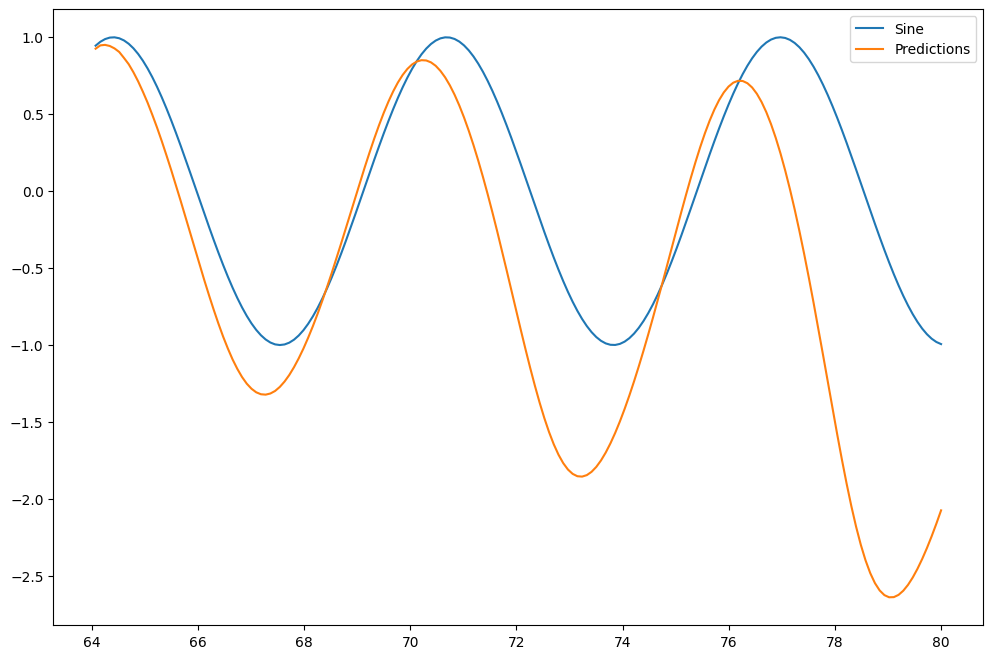

In [42]:
# Visualize the data of the updated test data
# Compare the preidcted sine wave against the original sine wave

data_test.plot(figsize=(12,8))